In [110]:
import numpy as np
import math
import matplotlib.pyplot as plt
#np.uint8(22)

In [111]:
def mincelfun(inarr,params = 3):
    retprob = np.zeros(params)
    totsum = 0
    for rowarr in inarr:
        for val in rowarr:
            totsum += val[1]
            try:
                retprob[int(val[0])] += float(val[1])
            except:
                print(rowarr)
    if (totsum == 0):
        retprob = np.zeros(params)
        retprob[0]=1
        return retprob
    return retprob/float(totsum)

def CA_city(init_mat,moore_n = 1,params = 3,debug =False):
    #assumes initmat is of shape N,N,2 
    init_dimx,init_dimy,init_pars = np.shape(init_mat)
    
    workgrid = np.zeros((init_dimx+ 2*moore_n,init_dimy+ 2*moore_n,init_pars))
    retgrid = init_mat.copy()
    workgrid[moore_n:-moore_n,moore_n:-moore_n]=init_mat
    for i,rowarr in enumerate(init_mat):
        for j,val in enumerate(rowarr):
            probs = mincelfun(workgrid[i:i+1 +2*moore_n,j:j+1+2*moore_n],params = 3)
            increase_param = np.random.choice(list(range(params)),1,p=probs)
            if increase_param == 0:
                continue
            elif increase_param == workgrid[i+moore_n,j+moore_n,0]:
                retgrid[i,j,1] += 1
            else:
                retgrid[i,j] = [increase_param,1]
    return retgrid


def init_grid(N,params):
    
    retgrid = np.zeros((N,N,2))
    center = math.floor(N/2)
    retgrid[:,:,1] =1
    retgrid[center,center,0] =1
    
    return retgrid

In [112]:
dimensions = 50
time =60
solution_dev = np.empty((time,dimensions,dimensions,2))
init_city = init_grid(dimensions,3)
solution_dev[0]=init_city
solution_dev[1] = CA_city(solution_dev[0])
for step in range(2,time):
    solution_dev[step] = CA_city(solution_dev[step-1])

C:\Users\HP\AppData\Local\Temp\ipykernel_19632\778579322.py:33: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  retgrid[i,j] = [increase_param,1]


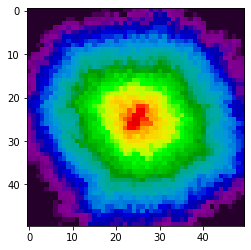

In [120]:
plt.imshow(solution_dev[59,:,:,1], cmap='nipy_spectral', vmin=0, vmax=60)